# ***Importing the data and performing the basic commands on data***

In [21]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
df=pd.read_csv("/content/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
# checking the number of the missing values in the dataset
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Handling the missing values

In [24]:
# seperating the columns based on type
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols =df.select_dtypes(include=['object']).columns
# fillin the missing values with median
for col in num_cols:
  df[col]=df[col].fillna(df[col].median())
# filling the missing values of the categorical values with mode
for col in cat_cols:
  df[col]=df[col].fillna(df[col].mode()[0])
print("\nmissing values after handling the values")
df.isnull().sum()



missing values after handling the values


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


**Normalizing the numerical values**

In [26]:
from sklearn.preprocessing import MinMaxScaler
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.000000,0.0,1.0,"Braund, Mr. Owen Harris",male,0.271174,0.125,0.0,A/5 21171,0.014151,B96 B98,S
1,0.001124,1.0,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,0.125,0.0,PC 17599,0.139136,C85,C
2,0.002247,1.0,1.0,"Heikkinen, Miss. Laina",female,0.321438,0.000,0.0,STON/O2. 3101282,0.015469,B96 B98,S
3,0.003371,1.0,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,0.125,0.0,113803,0.103644,C123,S
4,0.004494,0.0,1.0,"Allen, Mr. William Henry",male,0.434531,0.000,0.0,373450,0.015713,B96 B98,S


**Converting the categorical values into numerical using Label encoding**

In [27]:
from sklearn.preprocessing import LabelEncoder
# selecting only categorical columns only
cat_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.000000,0.0,1.0,108,1,0.271174,0.125,0.0,523,0.014151,47,2
1,0.001124,1.0,0.0,190,0,0.472229,0.125,0.0,596,0.139136,81,0
2,0.002247,1.0,1.0,353,0,0.321438,0.000,0.0,669,0.015469,47,2
3,0.003371,1.0,0.0,272,0,0.434531,0.125,0.0,49,0.103644,55,2
4,0.004494,0.0,1.0,15,1,0.434531,0.000,0.0,472,0.015713,47,2


**Visulizing the outliers and removing them**

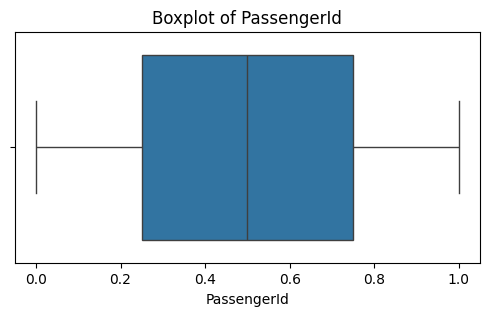

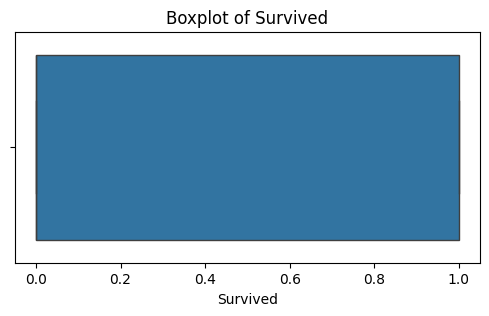

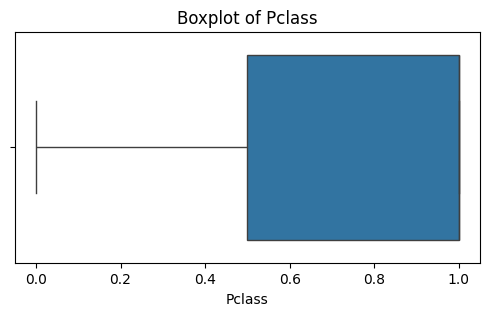

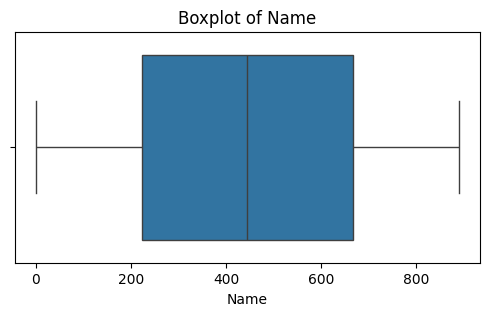

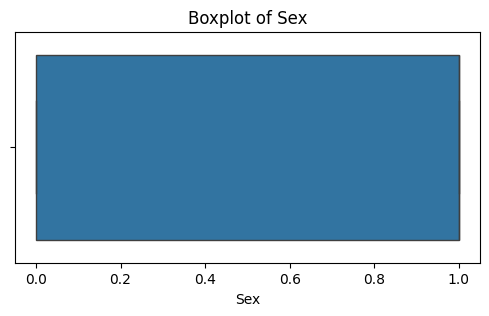

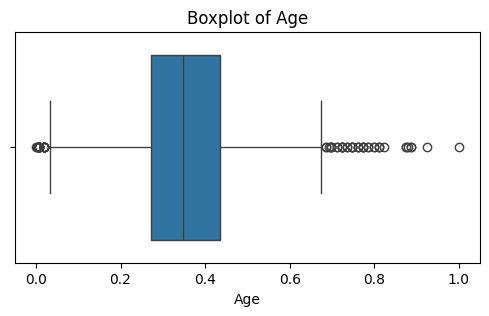

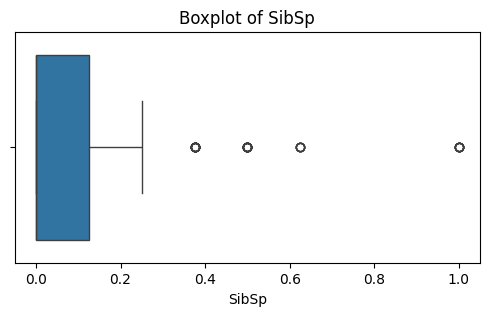

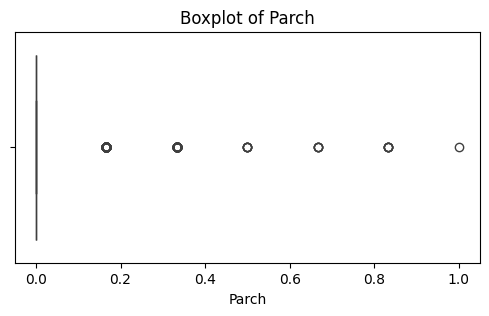

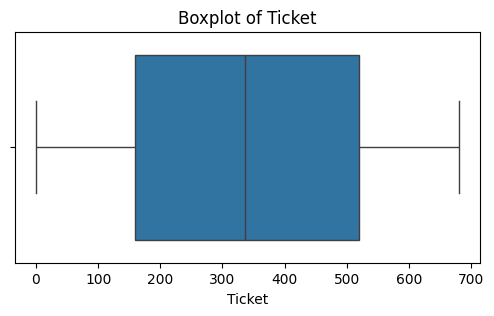

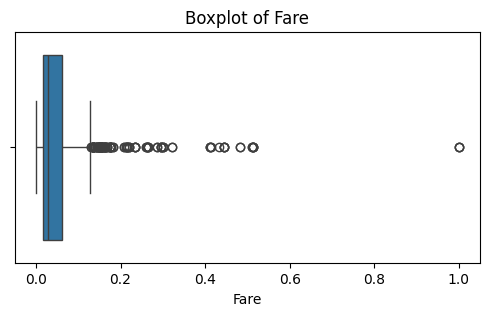

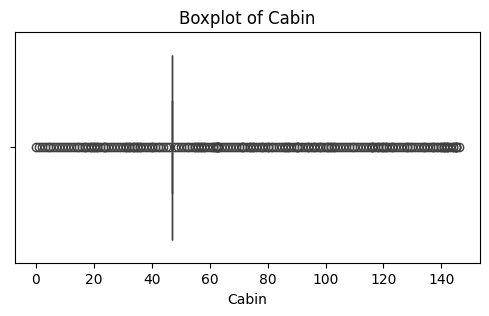

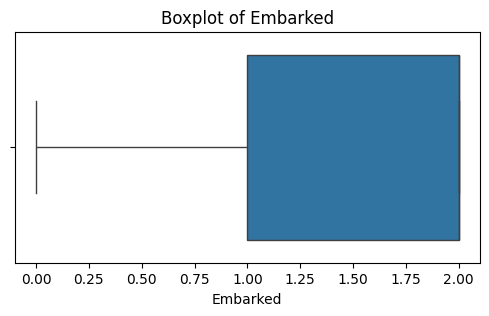

(491, 12)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

#Boxplot visualization
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

#Remove outliers using IQR method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

df.shape
